<a href="https://colab.research.google.com/github/yashyaks/Data2Knowledge/blob/master/IntrestRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_excel("https://raw.githubusercontent.com/yashyaks/Data2Knowledge/master/intrestrates_datasets/INTDSRINM193N.xls")

In [70]:
df

,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN
...,...,...
660,2022-03-01 00:00:00,4.25
661,2022-04-01 00:00:00,4.25
662,2022-05-01 00:00:00,4.65
663,2022-06-01 00:00:00,5.15


In [71]:
df = df.drop(range(0,10))

In [72]:
df

,FRED Graph Observations,Unnamed: 1
10,1968-01-01 00:00:00,6
11,1968-02-01 00:00:00,6
12,1968-03-01 00:00:00,5
13,1968-04-01 00:00:00,5
14,1968-05-01 00:00:00,5
...,...,...
660,2022-03-01 00:00:00,4.25
661,2022-04-01 00:00:00,4.25
662,2022-05-01 00:00:00,4.65
663,2022-06-01 00:00:00,5.15


In [73]:
df.rename(columns = {'FRED Graph Observations':'observation_date'}, inplace = True)

In [74]:
df.rename(columns = {'Unnamed: 1':'Intrest_Rates'}, inplace = True)

In [75]:
df

,observation_date,Intrest_Rates
10,1968-01-01 00:00:00,6
11,1968-02-01 00:00:00,6
12,1968-03-01 00:00:00,5
13,1968-04-01 00:00:00,5
14,1968-05-01 00:00:00,5
...,...,...
660,2022-03-01 00:00:00,4.25
661,2022-04-01 00:00:00,4.25
662,2022-05-01 00:00:00,4.65
663,2022-06-01 00:00:00,5.15


In [76]:
df['observation_date']=pd.to_datetime(df['observation_date'])

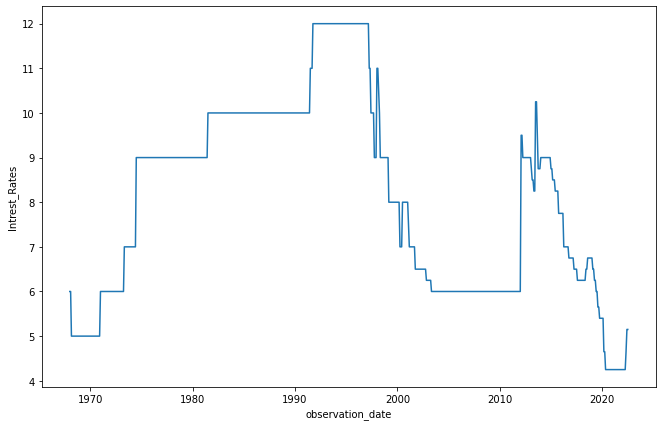

In [77]:
plt.figure(figsize=(11,7))
plt.plot(df['observation_date'],df['Intrest_Rates'])
plt.xlabel('observation_date')
plt.ylabel('Intrest_Rates')
plt.show()

In [78]:
df1=df[df['observation_date']<'01-01-2011']
df2=df[df['observation_date']>='01-01-2011']
print(df1.shape)
print(df2.shape)

(516, 2)
(139, 2)


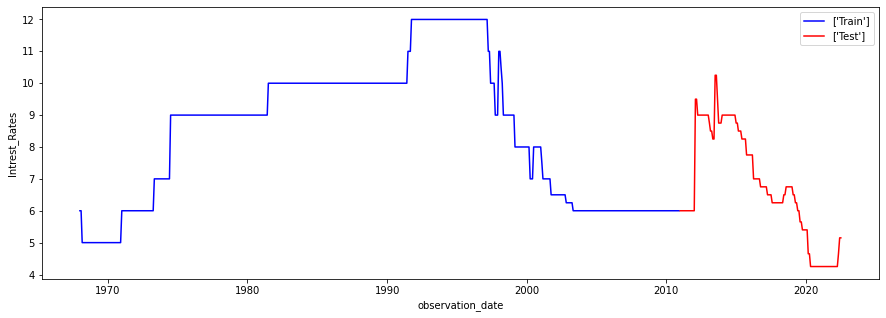

In [79]:
plt.figure(figsize=(15,5))
plt.plot(df1['observation_date'],df1['Intrest_Rates'],color='blue',label=['Train'])
plt.plot(df2['observation_date'],df2['Intrest_Rates'],color='red',label=['Test'])
plt.xlabel('observation_date')
plt.ylabel('Intrest_Rates')
plt.legend()
plt.show()

In [180]:
def feature(df):
  df['Month']=df['observation_date'].dt.month
  df['Year']=df['observation_date'].dt.year
  df3=df[['observation_date','Year','Month','Intrest_Rates']]
  return(df3)

In [181]:
df3=feature(df1)

<ipython-input-180-91fe2addf7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['observation_date'].dt.month
<ipython-input-180-91fe2addf7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['observation_date'].dt.year


In [182]:
df3

,observation_date,Year,Month,Intrest_Rates
10,1968-01-01,1968,1,6
11,1968-02-01,1968,2,6
12,1968-03-01,1968,3,5
13,1968-04-01,1968,4,5
14,1968-05-01,1968,5,5
...,...,...,...,...
521,2010-08-01,2010,8,6
522,2010-09-01,2010,9,6
523,2010-10-01,2010,10,6
524,2010-11-01,2010,11,6


In [183]:
df4=feature(df2)

<ipython-input-180-91fe2addf7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['observation_date'].dt.month
<ipython-input-180-91fe2addf7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['observation_date'].dt.year


In [184]:
df4

,observation_date,Year,Month,Intrest_Rates
526,2011-01-01,2011,1,6
527,2011-02-01,2011,2,6
528,2011-03-01,2011,3,6
529,2011-04-01,2011,4,6
530,2011-05-01,2011,5,6
...,...,...,...,...
660,2022-03-01,2022,3,4.25
661,2022-04-01,2022,4,4.25
662,2022-05-01,2022,5,4.65
663,2022-06-01,2022,6,5.15


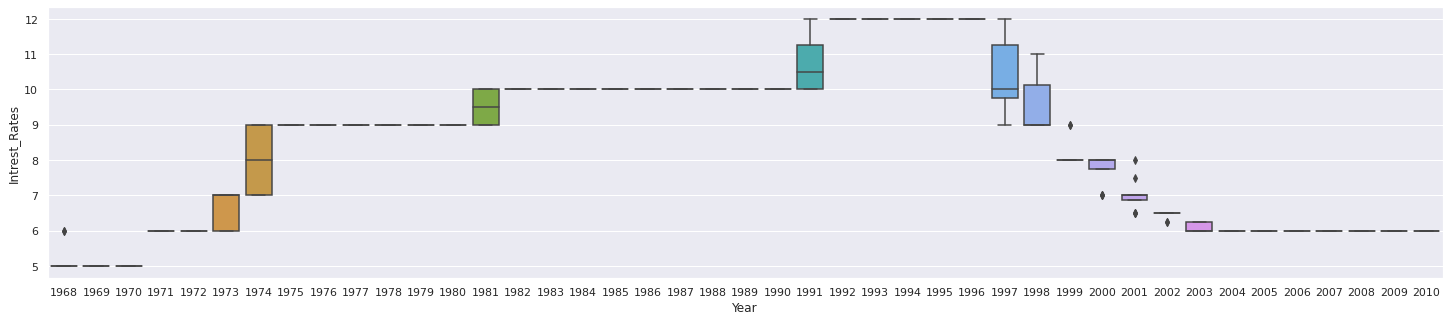

In [185]:
sns.set(rc={"figure.figsize": (25, 5)})
sns.boxplot(x='Year',y='Intrest_Rates',data=df3)

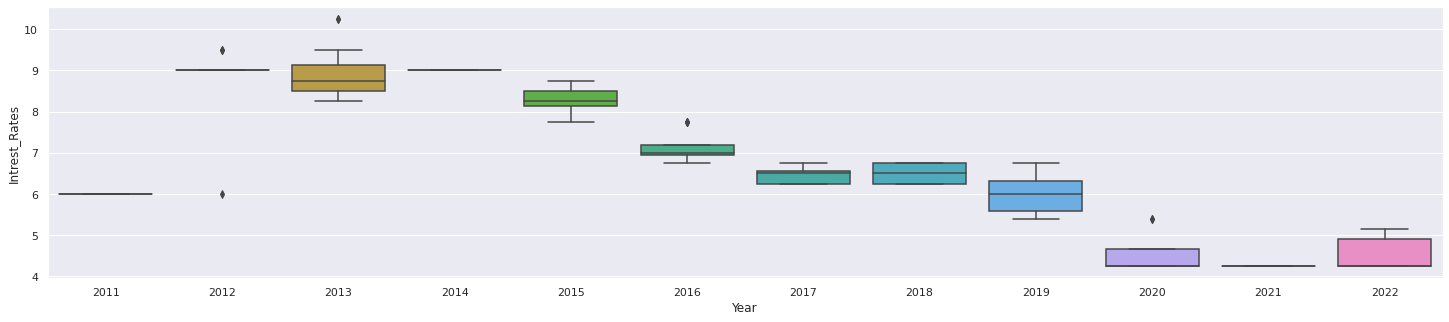

In [186]:
sns.set(rc={"figure.figsize": (25, 5)})
sns.boxplot(x='Year',y='Intrest_Rates',data=df4)

In [187]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [188]:
reg=xgb.XGBRegressor()

In [200]:
x_train=df3.iloc[:,1:4].values
y_train=df3.iloc[:,3].values

x_test=df4.iloc[:,1:4].values
y_test=df4.iloc[:,3].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[1968 1 6]
 [1968 2 6]
 [1968 3 5]
 ...
 [2010 10 6]
 [2010 11 6]
 [2010 12 6]]
[6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 11 11 10 10 10 

In [201]:
reg.fit(x_train,y_train)

[06:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [202]:
y_pred=reg.predict(x_test)

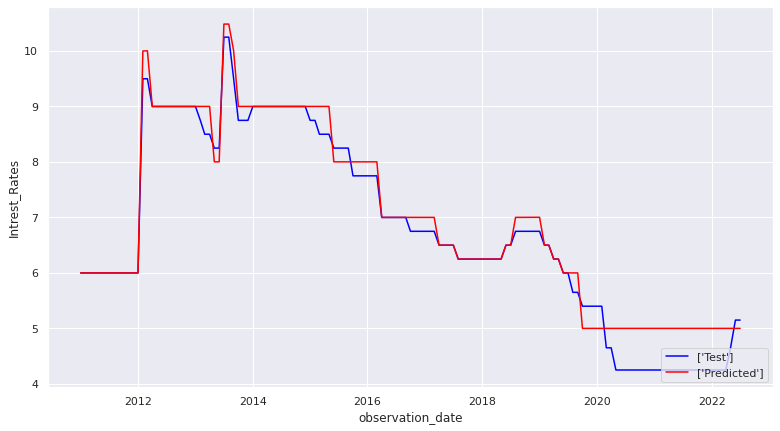

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.plot(df4['observation_date'],y_test,color='blue',label=['Test'])
plt.plot(df4['observation_date'],y_pred,color='red',label=['Predicted'])
plt.xlabel('observation_date')
plt.ylabel('Intrest_Rates')
plt.legend(loc='lower right')

In [204]:
mean_squared_error(y_test,y_pred)

0.13647681374350165

In [205]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9536674064377896